In [1]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
text = u'Hello, world!'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

Text: Hello, world!
Sentiment: 0.30000001192092896, 0.30000001192092896


In [25]:
import json
jsonfile = open('C:/Users/yiyi3/Team5_Microsoft.json')
jsondata = jsonfile.read()
textdata = json.loads(jsondata)
text = list(textdata['text'].values())
label = list(textdata['sentiment'].values())
print(text)
print(label)

['Greetings and welcome to the Microsoft Fiscal Year 2018 Third Quarter Earnings Conference Call. As a reminder, this conference is being recorded. It is now my pleasure to introduce your host, Mike Spencer, General Manager of Investor Relations. Thank you. You may begin.', 'Good afternoon and thank you for joining us today. On the call with me are Satya Nadella, Chief Executive Officer; Amy Hood, Chief Financial Officer; Frank Brod, Chief Accounting Officer; and Carolyn Frantz, Deputy General Counsel and Corporate Secretary.', "On the Microsoft Investor Relations website, you can find our earnings press release and financial summary slide deck, which is intended to supplement our prepared remarks during today's call and provides a reconciliation of differences between the GAAP and non-GAAP financial measures.", "Unless otherwise specified, we refer to non-GAAP metrics on the call. The non-GAAP financial measures provided should not be considered as a substitute for, or superior to, th

In [5]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
textdata = []
for str in text:
    textdata.append(types.Document(
    content=str,
    type=enums.Document.Type.PLAIN_TEXT))


In [12]:
# Instantiates a client
client = language.LanguageServiceClient()
sentiment=[]
for document in textdata:
    sentiment.append(client.analyze_sentiment(document=document).document_sentiment)
print(sentiment)

[magnitude: 1.2000000476837158
score: 0.20000000298023224
, magnitude: 0.800000011920929
score: 0.30000001192092896
, magnitude: 0.30000001192092896
score: 0.30000001192092896
, magnitude: 0.30000001192092896
, magnitude: 1.0
score: 0.20000000298023224
, magnitude: 0.6000000238418579
, , magnitude: 0.20000000298023224
score: -0.10000000149011612
, magnitude: 2.0
score: 0.5
, magnitude: 2.5
score: 0.800000011920929
, magnitude: 1.2000000476837158
score: 0.30000001192092896
, magnitude: 1.899999976158142
score: 0.6000000238418579
, magnitude: 1.7000000476837158
score: 0.30000001192092896
, magnitude: 0.800000011920929
score: 0.4000000059604645
, magnitude: 1.100000023841858
score: 0.30000001192092896
, magnitude: 1.100000023841858
score: 0.30000001192092896
, magnitude: 1.7000000476837158
score: 0.4000000059604645
, magnitude: 0.8999999761581421
score: 0.20000000298023224
, magnitude: 0.800000011920929
score: 0.800000011920929
, magnitude: 1.0
score: 0.5
, magnitude: 1.2000000476837158
s

In [14]:
import numpy as np
from sklearn.preprocessing import normalize
sentiment_score = list(map(lambda x : x.score, sentiment))
print(sentiment_score)
#norm_score = normalize(sentiment_score)
#print(norm_score)

[0.20000000298023224, 0.30000001192092896, 0.30000001192092896, 0.0, 0.20000000298023224, 0.0, 0.0, -0.10000000149011612, 0.5, 0.800000011920929, 0.30000001192092896, 0.6000000238418579, 0.30000001192092896, 0.4000000059604645, 0.30000001192092896, 0.30000001192092896, 0.4000000059604645, 0.20000000298023224, 0.800000011920929, 0.5, 0.6000000238418579, 0.20000000298023224, 0.800000011920929, 0.4000000059604645, 0.699999988079071, 0.5, 0.6000000238418579, 0.5, 0.10000000149011612, 0.800000011920929, 0.6000000238418579, -0.30000001192092896, 0.699999988079071, 0.10000000149011612, 0.5, 0.20000000298023224, 0.30000001192092896, 0.20000000298023224, 0.10000000149011612, 0.10000000149011612, 0.0, 0.30000001192092896, 0.10000000149011612, 0.20000000298023224, 0.5, 0.10000000149011612, 0.0, -0.10000000149011612, 0.0, 0.20000000298023224, -0.20000000298023224, 0.0, -0.4000000059604645, -0.5, 0.10000000149011612, 0.5, 0.20000000298023224, 0.0, -0.6000000238418579, 0.20000000298023224, 0.0, 0.80

In [21]:
predict = []
for score in sentiment_score:
    if score < 0:
        predict.append(0)
    else:
        predict.append(1)

print(predict)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


<Figure size 432x288 with 0 Axes>

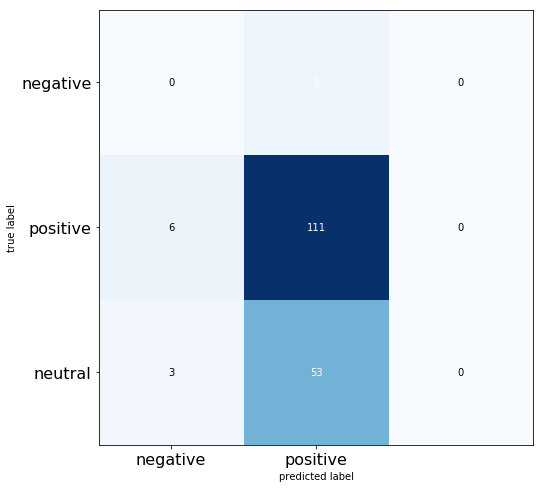

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(label, predict)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['negative','positive'], fontsize=16)
plt.yticks(range(3), ['negative','positive','neutral'], fontsize=16)
plt.show()